In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# параметры распределений
mu0, sigma0 = -2., 1.
mu1, sigma1 = 3., 2.

In [3]:
def sample(d0, d1, n=32):
    x0 = d0.sample((n,))
    x1 = d1.sample((n,))
    y0 = torch.zeros((n, 1))
    y1 = torch.ones((n, 1))
    return torch.cat([x0, x1], 0), torch.cat([y0, y1], 0)

In [4]:
d0 = torch.distributions.Normal(torch.tensor([mu0]), torch.tensor([sigma0]))
d1 = torch.distributions.Normal(torch.tensor([mu1]), torch.tensor([sigma1]))

In [5]:
layer = nn.Linear(1, 1)
print([p.data[0] for p in layer.parameters()])
layer_opt = optim.SGD(lr=1e-3, params=list(layer.parameters()))

[tensor([0.2140]), tensor(-0.1651)]


In [6]:
log_freq = 500
for i in range(10000):
    if i%log_freq == 0:
        with torch.no_grad():
            x, y = sample(d0, d1, 100000)
            out = torch.sigmoid(layer(x))
            loss = F.binary_cross_entropy(out, y)
        print('Ошибка после %d итераций: %f' %(i/log_freq, loss))
    layer_opt.zero_grad()
    x, y = sample(d0, d1, 1024)
    out = torch.sigmoid(layer(x))
    loss = F.binary_cross_entropy(out, y)
    loss.backward()
    layer_opt.step()

Ошибка после 0 итераций: 0.474379
Ошибка после 1 итераций: 0.304511
Ошибка после 2 итераций: 0.246605
Ошибка после 3 итераций: 0.216349
Ошибка после 4 итераций: 0.199451
Ошибка после 5 итераций: 0.186400
Ошибка после 6 итераций: 0.176853
Ошибка после 7 итераций: 0.170824
Ошибка после 8 итераций: 0.164613
Ошибка после 9 итераций: 0.162273
Ошибка после 10 итераций: 0.156899
Ошибка после 11 итераций: 0.155112
Ошибка после 12 итераций: 0.152604
Ошибка после 13 итераций: 0.151925
Ошибка после 14 итераций: 0.148385
Ошибка после 15 итераций: 0.146141
Ошибка после 16 итераций: 0.146594
Ошибка после 17 итераций: 0.146183
Ошибка после 18 итераций: 0.142640
Ошибка после 19 итераций: 0.142122


In [7]:
x_scale = np.linspace(-10, 10, 5000)
d0_pdf = stats.norm.pdf(x_scale, mu0, sigma0) 
d1_pdf = stats.norm.pdf(x_scale, mu1, sigma1)
x_tensor = torch.tensor(x_scale.reshape(-1, 1), dtype=torch.float)
with torch.no_grad():
    dist = torch.sigmoid(layer(x_tensor)).numpy()
ratio = d1_pdf / (d1_pdf + d0_pdf)

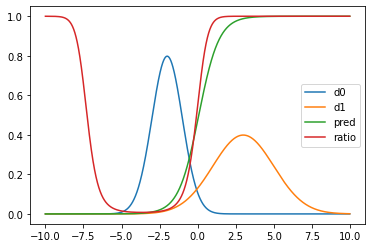

In [8]:
plt.plot(x_scale, d0_pdf*2, label='d0') # умножение на 2 для красоты графиков, на распределения не влияет
plt.plot(x_scale, d1_pdf*2, label='d1')
plt.plot(x_scale, dist.flatten(), label='pred')
plt.plot(x_scale, ratio, label='ratio')
plt.legend();

In [9]:
print([p.data[0] for p in layer.parameters()])

[tensor([1.5057]), tensor(-0.1165)]


In [10]:
torch.log(torch.sigmoid(torch.tensor(-100.)))

tensor(-inf)

In [12]:
F.logsigmoid(torch.tensor(-100.))

tensor(-100.)

In [13]:
#двумерное распределение
mu00, sigma00, mu01, sigma01, = -2., 1., -2., 1.
mu10, sigma10,  mu11, sigma11 = 3., 2., 3., 2.

In [15]:
d00 = torch.distributions.Normal(torch.tensor([mu00, mu01]), torch.tensor([sigma00, sigma10]))
d11 = torch.distributions.Normal(torch.tensor([mu10, mu11]), torch.tensor([sigma10, sigma11]))

In [16]:
layer2 = nn.Linear(2, 1)
print([p.data for p in layer2.parameters()])
layer_opt2 = optim.SGD(lr=1e-3, params=list(layer2.parameters()))

[tensor([[ 0.5025, -0.2196]]), tensor([0.0956])]


In [17]:
log_freq = 500
for i in range(10000):
    if i%log_freq == 0:
        with torch.no_grad():
            x, y = sample(d00, d11, 100000)
            out = torch.sigmoid(layer2(x))
            loss = F.binary_cross_entropy(out, y)
        print('Ошибка после %d итераций: %f' %(i/log_freq, loss))
    layer_opt2.zero_grad()
    x, y = sample(d00, d11, 1024)
    out = torch.sigmoid(layer2(x))
    loss = F.binary_cross_entropy(out, y)
    loss.backward()
    layer_opt2.step()

Ошибка после 0 итераций: 0.488171
Ошибка после 1 итераций: 0.208311
Ошибка после 2 итераций: 0.150331
Ошибка после 3 итераций: 0.125712
Ошибка после 4 итераций: 0.111692
Ошибка после 5 итераций: 0.102109
Ошибка после 6 итераций: 0.095678
Ошибка после 7 итераций: 0.090924
Ошибка после 8 итераций: 0.086479
Ошибка после 9 итераций: 0.083245
Ошибка после 10 итераций: 0.080921
Ошибка после 11 итераций: 0.078098
Ошибка после 12 итераций: 0.076560
Ошибка после 13 итераций: 0.075071
Ошибка после 14 итераций: 0.073560
Ошибка после 15 итераций: 0.072695
Ошибка после 16 итераций: 0.070684
Ошибка после 17 итераций: 0.070587
Ошибка после 18 итераций: 0.070181
Ошибка после 19 итераций: 0.068415


In [31]:
x1, y1 = sample(d00, d11, 1)
x2, y2 = sample(d0, d1, 1)

In [47]:
x_scale = np.linspace(-8, 8, 5000)
y_scale = np.linspace(-8, 8, 5000)
# xy = np.column_stack([x_scale.flat, y_scale.flat])
xx, yy = np.meshgrid(x_scale, y_scale)
d00_pdf = stats.multivariate_normal([mu00, mu01], [[sigma00, 0], [0, sigma01]])
d11_pdf = stats.multivariate_normal([mu10, mu11], [[sigma10, 0], [0, sigma11]])


# d0_pdf = stats.norm.pdf(x_scale, mu0, sigma0)
# d1_pdf = stats.norm.pdf(x_scale, mu1, sigma1)
# # x_tensor = torch.tensor(x_sc ale.reshape(-1, 1), dtype=torch.float)
# # with torch.no_grad():
#     dist = torch.sigmoid(layer(x_tensor)).numpy()
# ratio = d1_pdf / (d1_pdf + d0_pdf)

In [48]:
pos = np.empty(xx.shape + (2,))
pos[:, :, 0] = xx; pos[:, :, 1] = yy

In [61]:
x_tensor2 = torch.tensor(pos.reshape(-1, 2), dtype=torch.float)
with torch.no_grad():
    dist2 = torch.sigmoid(layer2(x_tensor2)).numpy()
ratio = d11_pdf.pdf(pos) / (d11_pdf.pdf(pos)  + d00_pdf.pdf(pos))


In [77]:
dist2.reshape(5000,5000).shape

(5000, 5000)

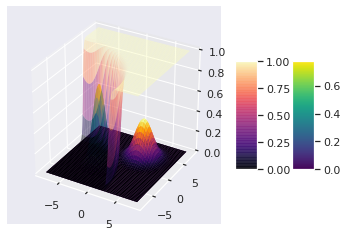

In [80]:
# plt.plot(x_scale, d0_pdf*2, label='d0') # умножение на 2 для красоты графиков, на распределения не влияет
# plt.plot(x_scale, d1_pdf*2, label='d1')
# plt.plot(x_scale, dist.flatten(), label='pred')
# plt.plot(x_scale, ratio, label='ratio')
import seaborn as sns
from matplotlib import cm
sns.set()

fig = plt.figure()
ax = fig.gca(projection='3d')
s_ratio = ax.plot_surface(xx, yy, ratio, cmap='magma', alpha=0.5, linewidth=0)
# s_pred = ax.plot_surface(xx, yy, dist2.reshape(5000,5000), cmap='plasma', alpha=0.5, linewidth=0)
s1 = ax.plot_surface(xx, yy, d00_pdf.pdf(pos)*5, cmap='viridis',linewidth=0)
s2 = ax.plot_surface(xx, yy, d11_pdf.pdf(pos)*5, cmap='inferno', linewidth=0)

# ax.set_xlabel('X axis')
# ax.set_ylabel('Y axis')
# ax.set_zlabel('Z axis')
# ax.set_label('test')
# ax.legend()
# fig.colorbar(s1, shrink=0.5, aspect=5)
fig.colorbar(s1, shrink=0.5, aspect=5)
fig.colorbar(s_ratio, shrink=0.5, aspect=5)
# fig.colorbar(s_ratio, shrink=0.5, aspect=5)
plt.show()

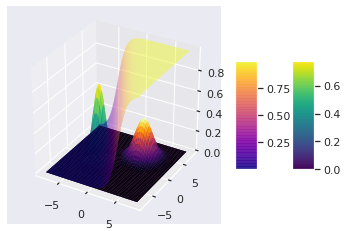

In [81]:
fig = plt.figure()
ax = fig.gca(projection='3d')
s_pred = ax.plot_surface(xx, yy, dist2.reshape(5000,5000), cmap='plasma', alpha=0.5, linewidth=0)
s1 = ax.plot_surface(xx, yy, d00_pdf.pdf(pos)*5, cmap='viridis',linewidth=0)
s2 = ax.plot_surface(xx, yy, d11_pdf.pdf(pos)*5, cmap='inferno', linewidth=0)

fig.colorbar(s1, shrink=0.5, aspect=5)
fig.colorbar(s_pred, shrink=0.5, aspect=5)

plt.show()

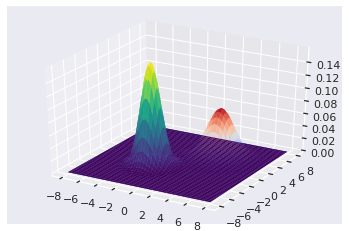

In [64]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, d00_pdf.pdf(pos), cmap='viridis',linewidth=0)
ax.plot_surface(xx, yy, d11_pdf.pdf(pos), cmap=cm.coolwarm, linewidth=0)
# ax.set_xlabel('X axis')
# ax.set_ylabel('Y axis')
# ax.set_zlabel('Z axis')
# ax.set_label('test')
# ax.legend()
# fig.colorbar(s1, shrink=0.5, aspect=5)
# fig.colorbar(s2, shrink=0.5, aspect=5)
# fig.colorbar(s_ratio, shrink=0.5, aspect=5)
plt.show()